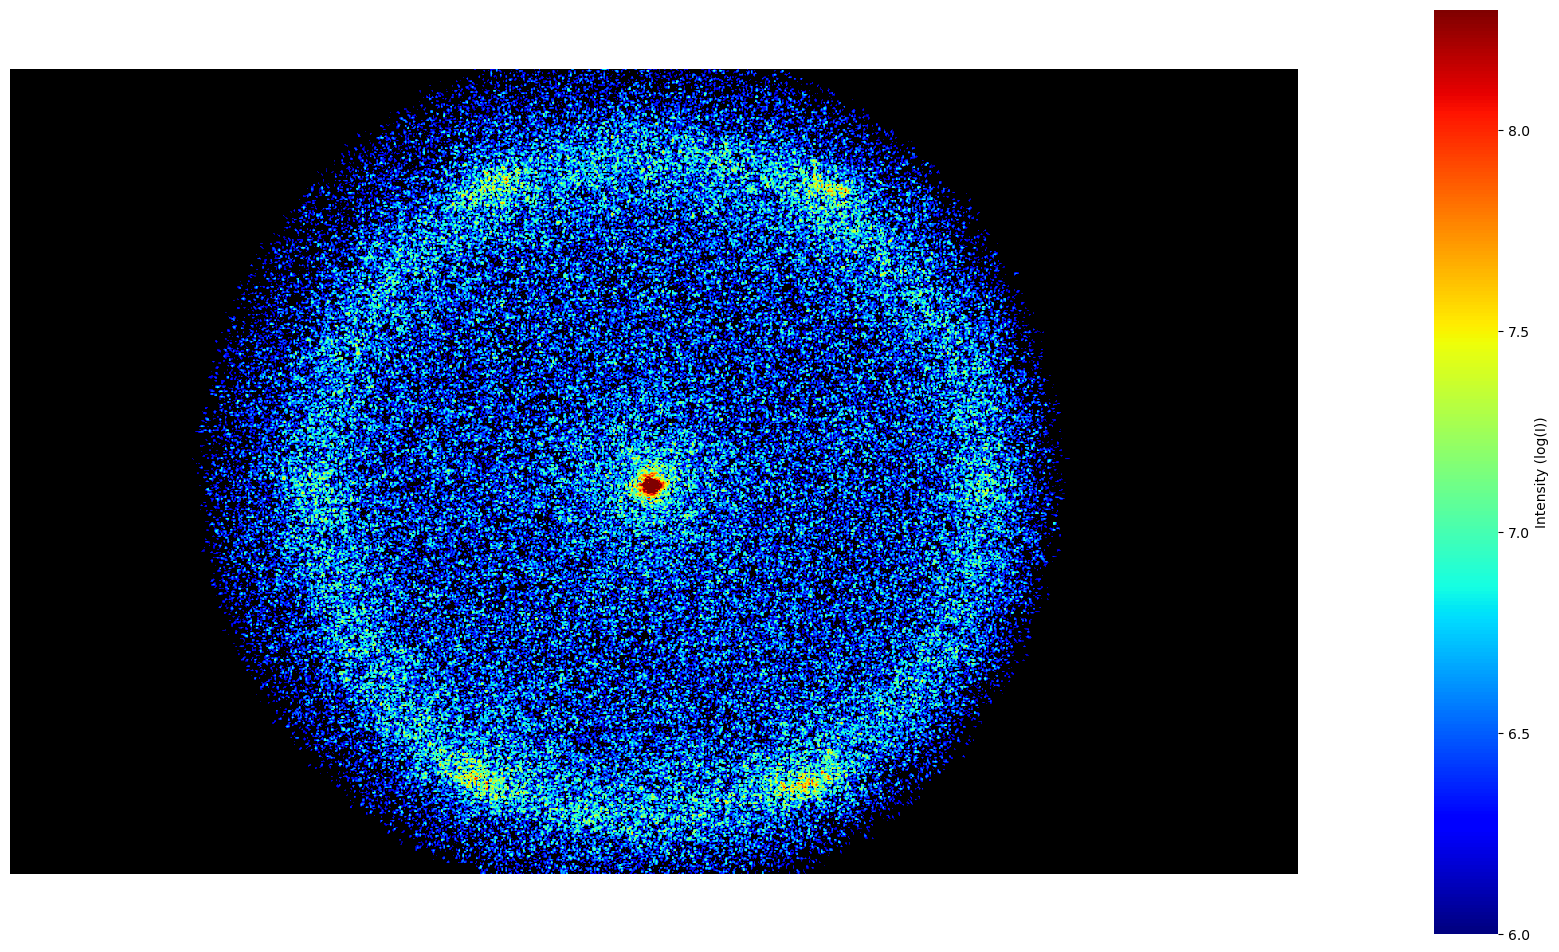

In [1]:
import numpy as np
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
import diffraction as di

# Set the data folder and background folder paths
folder_path = r'F:\experiment\laser scattering system\test'
folder_back_path = r'F:\experiment\laser scattering system\test\back'
#set image range
start_num=1
end_num=5
# Draw and save the image with the background removed
avg_image = di.avg_images(folder_path, start_num, end_num)
back_image = di.avg_images(folder_back_path, start_num, end_num)
image = di.subtract_background(avg_image, back_image)
channel = image[:, :, 2]  # Blue, green, and red correspond to channel indices 0, 1, and 2.
threshold = 6
di.plot_heatmap(channel, folder_path, threshold)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


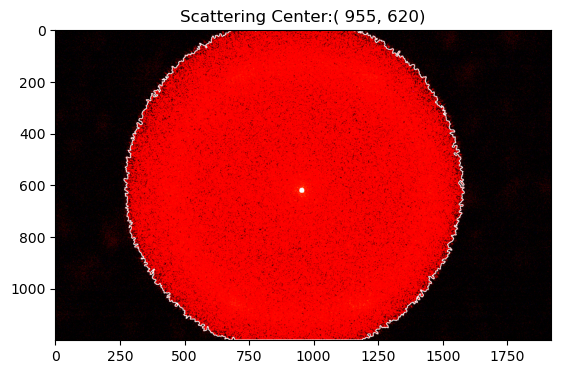

In [2]:
largest_contour, center_x, center_y = di.detect_scattering_range(channel, image)

In [3]:
average_and_variance_df = di.calculate_average_and_variance(channel, center_x, center_y, largest_contour)
print(average_and_variance_df)

            R  average_intensity  intensity_variance
0        0.00           4043.000                 NaN
1        1.00           4039.000            8.000000
2        1.41           4036.250           10.874282
3        2.00           4040.250            9.142392
4        2.24           4039.625            7.981004
...       ...                ...                 ...
52752  688.90            123.000           73.511904
52753  688.93            266.000                 NaN
52754  688.94            130.000           71.840100
52755  688.97            196.000            2.828427
52756  688.99            145.000           14.177447

[52757 rows x 3 columns]


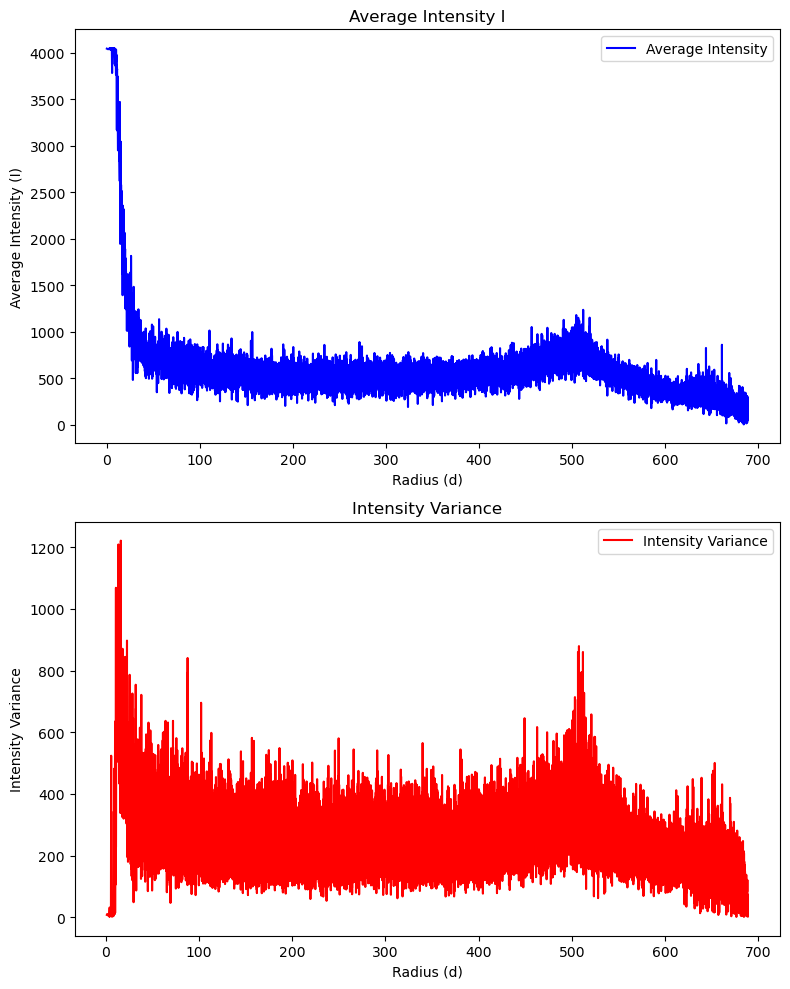

In [4]:
# plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.plot(average_and_variance_df['R'], average_and_variance_df['average_intensity'], color='b', label="Average Intensity")
ax1.set_xlabel("Radius (d)")
ax1.set_ylabel("Average Intensity (I)")
ax1.set_title("Average Intensity I")
ax1.legend()

ax2.plot(average_and_variance_df['R'], average_and_variance_df['intensity_variance'], color='r', label="Intensity Variance")
ax2.set_xlabel("Radius (d)")
ax2.set_ylabel("Intensity Variance")
ax2.set_title("Intensity Variance")
ax2.legend()
plt.tight_layout()
plt.show()

In [ ]:
radii = average_and_variance_df['R'].values
#define linear relationship between radii and scattering angle theta
theta = (0.07129*radii-0.39385)/2 #Using 2D grating calibration to obtain for 405
# set test parameters
lambda_ = 405  # laser wavelength (unit: nm)
n_eff = 1.5 #effective index of sample
alpha = 45 #alpha (unit: degree)
#calculate q values
q_values = di.calculate_q(theta, n_eff, alpha, lambda_)  
q = q_values*1000 #Convert the unit to um-1
qR = q_values*520 #Normalization, particle radius: 520 nm
#save results
average_and_variance_df['q'] = q
average_and_variance_df['qR'] = qR
average_and_variance_df = average_and_variance_df[['R', 'q', 'qR', 'average_intensity', 'intensity_variance']]
average_and_variance_df.to_excel(fr'{folder_path}\1D_scattering_profile.xlsx', index=False)